In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('../../../../Dataset/Stock_price/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('../../../../Dataset/Stock_price/Google_Stock_Price_Test.csv')

In [3]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [6]:
df_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

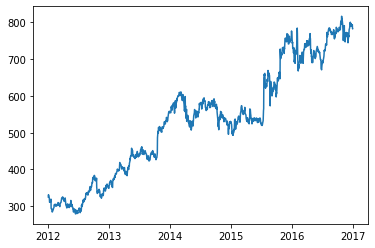

In [7]:
plt.plot(pd.to_datetime(df_train['Date']), df_train['Open'])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
df_train['Volume'] = df_train['Volume'].apply(lambda i : int(''.join(i.split(','))))

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 59.1+ KB


In [11]:
#df_train['Close']

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: object

In [13]:
#df_train['Close'] = df_train['Close'].apply(lambda i : float(''.join(i.split(','))))

In [14]:
#df_train['Close']

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_train[['Open','High','Low','Volume']])

In [13]:
X_scaled.shape

(1258, 4)

In [14]:
X_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

In [15]:
X_scaled[60,0]

0.08627874097775134

In [16]:
X_train = []
y_train = []
for i in range(1198):
    row = X_scaled[i:i+60,:]
    y = X_scaled[i+60,:]
    X_train.append(row)
    y_train.append(y)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [17]:
X_train.shape

(1198, 60, 4)

In [18]:
y_train.shape

(1198, 4)

In [19]:
X_train = X_train.reshape(1198,60,4)

In [20]:
# Model Building
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(80, return_sequences = True, input_shape = (60,4)))
model.add(LSTM(80, return_sequences = True))
model.add(LSTM(80, return_sequences = True))
model.add(LSTM(80, return_sequences = False))
model.add(Dense(4))

model.compile(loss='mean_squared_error')

In [22]:
hist = model.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
38/38 [==============================] - 11s 89ms/step - loss: 0.0333
Epoch 2/50
38/38 [==============================] - 3s 89ms/step - loss: 0.0109
Epoch 3/50
38/38 [==============================] - 3s 90ms/step - loss: 0.0091
Epoch 4/50
38/38 [==============================] - 3s 87ms/step - loss: 0.0081
Epoch 5/50
38/38 [==============================] - 3s 88ms/step - loss: 0.0063
Epoch 6/50
38/38 [==============================] - 4s 96ms/step - loss: 0.0066
Epoch 7/50
38/38 [==============================] - 3s 86ms/step - loss: 0.0053
Epoch 8/50
38/38 [==============================] - 3s 85ms/step - loss: 0.0052
Epoch 9/50
38/38 [==============================] - 3s 85ms/step - loss: 0.0044
Epoch 10/50
38/38 [==============================] - 4s 98ms/step - loss: 0.0046
Epoch 11/50
38/38 [==============================] - 3s 84ms/step - loss: 0.0038
Epoch 12/50
38/38 [==============================] - 4s 103ms/step - loss: 0.0041
Epoch 13/50
38/38 [================

In [23]:
df_test['Volume'] = df_test['Volume'].apply(lambda i : int(''.join(i.split(','))))

In [24]:
X_test_scaled = scaler.transform(df_test[['Open','High','Low','Volume']])

In [25]:
temp = np.vstack([X_scaled[-60:], X_test_scaled])

In [26]:
temp.shape

(80, 4)

In [27]:
X_test = []
for i in range(20):
    row = temp[i:i+60,:]
    X_test.append(row)
X_test = np.array(X_test)

In [28]:
X_test.shape

(20, 60, 4)

In [29]:
X_test = X_test.reshape(20,60,4)

In [30]:
yp = model.predict(X_test)
yp

array([[0.95274377, 0.9514471 , 0.95694417, 0.05450585],
       [0.9617012 , 0.9598038 , 0.9663603 , 0.05535362],
       [0.9691226 , 0.96638346, 0.9737559 , 0.05238556],
       [0.9669801 , 0.964394  , 0.9710447 , 0.05201729],
       [0.98150426, 0.97733486, 0.98509365, 0.05160014],
       [0.98761445, 0.9826745 , 0.9905214 , 0.04939387],
       [0.98616594, 0.98123056, 0.9884197 , 0.04872681],
       [0.98491615, 0.9800973 , 0.98695344, 0.04885955],
       [0.9837215 , 0.9793078 , 0.9857902 , 0.05011708],
       [0.9929137 , 0.9875194 , 0.99518156, 0.04901378],
       [0.98044395, 0.97677994, 0.98255676, 0.05049732],
       [0.98419493, 0.980205  , 0.9867542 , 0.05131565],
       [0.9867825 , 0.98258436, 0.9895936 , 0.05000304],
       [0.9803791 , 0.9772427 , 0.9831136 , 0.05209289],
       [0.9895007 , 0.98552924, 0.9923728 , 0.05335507],
       [1.0026065 , 0.996873  , 1.0052117 , 0.05067371],
       [1.0089607 , 1.0021042 , 1.0106745 , 0.04872527],
       [1.001918  , 0.9962605 ,

In [31]:
yp.shape

(20, 4)

In [32]:
yp = scaler.inverse_transform(yp)
yp

array([[7.9127692e+02, 7.9068140e+02, 7.8240997e+02, 1.3689110e+06],
       [7.9609210e+02, 7.9515619e+02, 7.8738092e+02, 1.3900799e+06],
       [8.0008154e+02, 7.9867938e+02, 7.9128522e+02, 1.3159675e+06],
       [7.9892981e+02, 7.9761407e+02, 7.8985394e+02, 1.3067718e+06],
       [8.0673743e+02, 8.0454352e+02, 7.9727063e+02, 1.2963556e+06],
       [8.1002203e+02, 8.0740271e+02, 8.0013605e+02, 1.2412650e+06],
       [8.0924335e+02, 8.0662952e+02, 7.9902655e+02, 1.2246085e+06],
       [8.0857153e+02, 8.0602271e+02, 7.9825244e+02, 1.2279230e+06],
       [8.0792932e+02, 8.0559998e+02, 7.9763837e+02, 1.2593236e+06],
       [8.1287067e+02, 8.0999701e+02, 8.0259625e+02, 1.2317741e+06],
       [8.0616742e+02, 8.0424640e+02, 7.9593140e+02, 1.2688180e+06],
       [8.0818384e+02, 8.0608038e+02, 7.9814722e+02, 1.2892519e+06],
       [8.0957483e+02, 8.0735449e+02, 7.9964624e+02, 1.2564760e+06],
       [8.0613257e+02, 8.0449420e+02, 7.9622534e+02, 1.3086596e+06],
       [8.1103601e+02, 8.0893134e+

In [33]:
yp.shape

(20, 4)

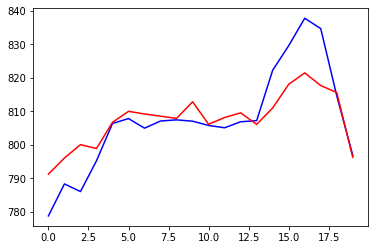

In [34]:
# Open
plt.plot(df_test['Open'], c='blue')
plt.plot(yp[:,0], c='red')

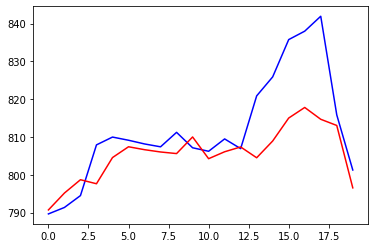

In [35]:
# High
plt.plot(df_test['High'], c='blue')
plt.plot(yp[:,1], c='red')

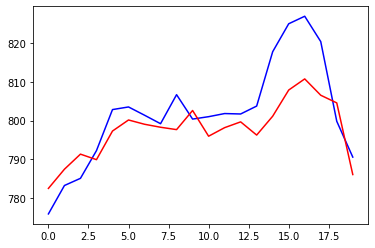

In [36]:
# Low
plt.plot(df_test['Low'], c='blue')
plt.plot(yp[:,2], c='red')

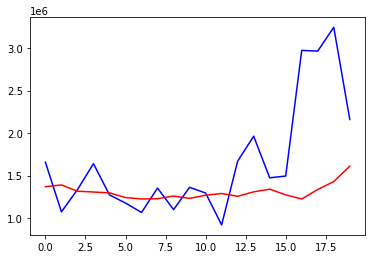

In [37]:
# Volume
plt.plot(df_test['Volume'], c='blue')
plt.plot(yp[:,3], c='red')